# Support Vector Machines

### Principles of Data Mining and Machine Learning 2023

#### In this tutorial you are given a task of classifying students grades bases on various properties of the students and their families. The students can have 5 kinds of grades - Excellent, Very good, Good, Satisfactory, and poor.

#### You need to develop different classifiers and determine which one of them give best performaces on various metrices.



### Import Libraries.
#### I have imported few new libraries for this week  but you need to import rest of them.


In [2]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Your code to import all the relevant libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Read and display dataset.

In [3]:
# Your code to read data
dataset = pd.read_csv('student_performances.csv')  

# Your code to print first few samples of the dataset.
dataset.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,grades
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,no,no,4,3,4,1,1,3,6,poor
1,F,17,U,GT3,T,1,1,at_home,other,course,...,yes,no,5,3,3,1,1,3,4,poor
2,F,15,U,LE3,T,1,1,at_home,other,other,...,yes,no,4,3,2,2,3,3,10,satisfactory
3,F,15,U,GT3,T,4,2,health,services,home,...,yes,yes,3,2,2,1,1,5,2,very good
4,F,16,U,GT3,T,3,3,other,other,home,...,no,no,4,3,2,1,2,5,4,satisfactory


### Print the information about the dataset.

#### You need to convert all the object datatypes (except output variable - grades) to the numbers using either labelencoding or one hot encoding.



In [4]:
# Your code to print the key information about the datset. Use - .info method.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   address     395 non-null    object
 3   famsize     395 non-null    object
 4   Pstatus     395 non-null    object
 5   Medu        395 non-null    int64 
 6   Fedu        395 non-null    int64 
 7   Mjob        395 non-null    object
 8   Fjob        395 non-null    object
 9   reason      395 non-null    object
 10  guardian    395 non-null    object
 11  traveltime  395 non-null    int64 
 12  studytime   395 non-null    int64 
 13  failures    395 non-null    int64 
 14  schoolsup   395 non-null    object
 15  famsup      395 non-null    object
 16  paid        395 non-null    object
 17  activities  395 non-null    object
 18  nursery     395 non-null    object
 19  higher      395 non-null    object
 20  internet  

### Converting the columns  ['Fjob', 'Mjob', 'reason', 'guardian'] into one hot vectors.



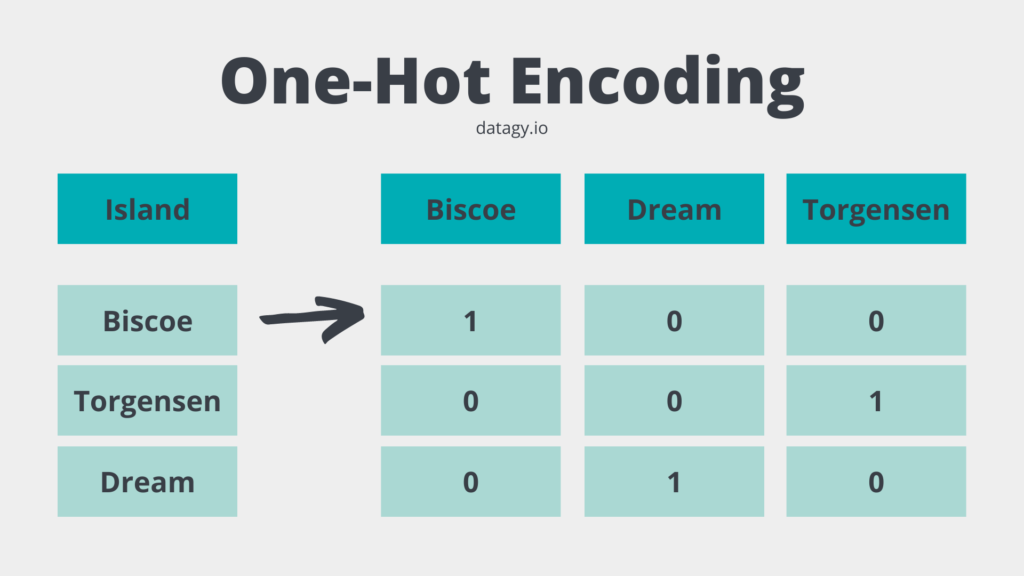

Convert categorical variable into dummy/indicator variables.

Each variable is converted in as many 0/1 variables as there are different
values. Columns in the output are each named after a value; if the input is
a DataFrame, the name of the original variable is prepended to the value.


In [6]:
data = pd.get_dummies(dataset, columns = ['Fjob', 'Mjob', 'reason', 'guardian'], dtype=int)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    object
 1   age                395 non-null    int64 
 2   address            395 non-null    object
 3   famsize            395 non-null    object
 4   Pstatus            395 non-null    object
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    object
 11  famsup             395 non-null    object
 12  paid               395 non-null    object
 13  activities         395 non-null    object
 14  nursery            395 non-null    object
 15  higher             395 non-null    object
 16  internet           395 non-null    object
 1

#### Note that you can also use sklearn.preprocessing.OneHotEncoder instead of pd.get_dummies.


### Next, print the first few rows of the data (dataset have been stored in data in previous cell).


In [8]:
# Your code to print first few rows of the data.

data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,F,18,U,GT3,A,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,F,17,U,GT3,T,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,F,15,U,LE3,T,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,F,15,U,GT3,T,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,F,16,U,GT3,T,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0


#### Converting other text values in the dataframe to numbers using label encoding.


In [1]:
#LabelEncoder?
# Encode target labels with value between 0 and n_classes-1.

In [10]:
labelencoder = LabelEncoder()

labelencoder.fit(data['sex'])
data['sex'] = labelencoder.transform(data['sex'])

In [11]:
data['sex'].value_counts()

sex
0    208
1    187
Name: count, dtype: int64

In [12]:
# Your code to convert transform address to the numbers

labelencoder.fit(data['address'])
data['address'] = labelencoder.transform(data['address'])

In [13]:
data['address'].value_counts()

address
1    307
0     88
Name: count, dtype: int64

In [14]:
## Your code to convert transform famsize to the numbers

labelencoder.fit(data['famsize'])
data['famsize'] = labelencoder.transform(data['famsize'])

In [15]:
data['famsize'].value_counts()

famsize
0    281
1    114
Name: count, dtype: int64

In [16]:
## Your code to convert transform Pstatus to the numbers

labelencoder.fit(data['Pstatus'])
data['Pstatus'] = labelencoder.transform(data['Pstatus'])

In [17]:
data['Pstatus'].value_counts()

Pstatus
1    354
0     41
Name: count, dtype: int64

In [18]:
## Your code to convert transform schoolsup to the numbers

labelencoder.fit(data['schoolsup'])
data['schoolsup'] = labelencoder.transform(data['schoolsup'])

In [19]:
data['schoolsup'].value_counts()

schoolsup
0    344
1     51
Name: count, dtype: int64

In [20]:
## Your code to convert transform famsup to the numbers

labelencoder.fit(data['famsup'])
data['famsup'] = labelencoder.transform(data['famsup'])

In [21]:
data['famsup'].value_counts()

famsup
1    242
0    153
Name: count, dtype: int64

In [22]:
## Your code to convert transform paid to the numbers

labelencoder.fit(data['paid'])
data['paid'] = labelencoder.transform(data['paid'])

In [23]:
data['paid'].value_counts()

paid
0    214
1    181
Name: count, dtype: int64

In [24]:
## Your code to convert transform activities to the numbers

labelencoder.fit(data['activities'])
data['activities'] = labelencoder.transform(data['activities'])

In [25]:
data['activities'].value_counts()

activities
1    201
0    194
Name: count, dtype: int64

In [26]:
## Your code to convert transform nursery to the numbers

labelencoder.fit(data['nursery'])
data['nursery'] = labelencoder.transform(data['nursery'])

In [27]:
data['nursery'].value_counts()

nursery
1    314
0     81
Name: count, dtype: int64

In [28]:
## Your code to convert transform higher to the numbers

labelencoder.fit(data['higher'])
data['higher'] = labelencoder.transform(data['higher'])

In [29]:
data['higher'].value_counts()

higher
1    375
0     20
Name: count, dtype: int64

In [30]:
## Your code to convert transform internet to the numbers

labelencoder.fit(data['internet'])
data['internet'] = labelencoder.transform(data['internet'])

In [31]:
data['internet'].value_counts()

internet
1    329
0     66
Name: count, dtype: int64

In [32]:
## Your code to convert transform romantic to the numbers

labelencoder.fit(data['romantic'])
data['romantic'] = labelencoder.transform(data['romantic'])

In [33]:
data['romantic'].value_counts()

romantic
0    263
1    132
Name: count, dtype: int64

#### Is their an efficient way to do this? Could you use loops. Try to convert it into an efficient code and replace with the above code?


In [34]:
columns_to_numbers = ['sex','address','famsize','Pstatus','schoolsup','famsup',
                      'paid','activities','nursery','higher','internet','romantic']
columns_to_numbers

['sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [35]:
for column in columns_to_numbers:
    labelencoder.fit(data[column])
    data[column] = labelencoder.transform(data[column])

In [36]:
# Checking

data['romantic'].value_counts()

romantic
0    263
1    132
Name: count, dtype: int64

#### Next - Print few samples of the data to ensure everything is number except 'grades' column.


In [37]:
# Your code to print first few samples of the data.

data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,Mjob_other,Mjob_services,Mjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0,18,1,0,0,4,4,2,2,0,...,0,0,0,1,0,0,0,0,1,0
1,0,17,1,0,1,1,1,1,2,0,...,0,0,0,1,0,0,0,1,0,0
2,0,15,1,1,1,1,1,1,2,3,...,0,0,0,0,0,1,0,0,1,0
3,0,15,1,0,1,4,2,1,3,0,...,0,0,0,0,1,0,0,0,1,0
4,0,16,1,0,1,3,3,1,2,0,...,1,0,0,0,1,0,0,1,0,0


In [38]:
# Your code to print information on the samples of data.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 43 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   sex                395 non-null    int64 
 1   age                395 non-null    int64 
 2   address            395 non-null    int64 
 3   famsize            395 non-null    int64 
 4   Pstatus            395 non-null    int64 
 5   Medu               395 non-null    int64 
 6   Fedu               395 non-null    int64 
 7   traveltime         395 non-null    int64 
 8   studytime          395 non-null    int64 
 9   failures           395 non-null    int64 
 10  schoolsup          395 non-null    int64 
 11  famsup             395 non-null    int64 
 12  paid               395 non-null    int64 
 13  activities         395 non-null    int64 
 14  nursery            395 non-null    int64 
 15  higher             395 non-null    int64 
 16  internet           395 non-null    int64 
 1

### Separate input X and output y.

#### X is the all columns except 'grades'.
#### y is 'grades' column.


In [39]:
# Your code to get X from data

X = data.drop('grades',axis=1).values

In [40]:
# Your code to get y from data

In [41]:
data['grades'].value_counts()

grades
poor            130
satisfactory    103
good             62
very good        60
excellent        40
Name: count, dtype: int64

In [42]:
labelencoder.fit(data['grades'])
data['grades'] = labelencoder.transform(data['grades'])

In [43]:
data['grades'].value_counts()

grades
2    130
3    103
1     62
4     60
0     40
Name: count, dtype: int64

In [44]:
y = data['grades'].values

#### Print shapes of X and y to make sure everything is good


In [46]:
# Print shape of X
print(X.shape)

# Print shape of y
print(y.shape)

# Print X
print(X)

# Print y
print(y)

(395, 42)
(395,)
[[ 0 18  1 ...  0  1  0]
 [ 0 17  1 ...  1  0  0]
 [ 0 15  1 ...  0  1  0]
 ...
 [ 1 21  0 ...  0  0  1]
 [ 1 18  0 ...  0  1  0]
 [ 1 19  1 ...  1  0  0]]
[2 2 3 4 3 4 3 2 0 4 2 1 4 3 0 4 4 3 2 3 4 4 0 1 2 2 3 4 3 3 1 0 0 1 4 2 0
 4 3 1 3 1 0 3 2 2 3 0 4 2 1 1 3 3 1 3 4 4 2 0 3 3 2 2 3 4 1 2 2 0 4 3 2 4
 3 3 3 3 3 2 1 3 2 4 3 2 2 4 3 2 2 0 2 3 4 3 4 3 4 2 2 0 4 2 0 3 2 0 1 0 0
 3 1 0 2 0 4 1 2 1 4 4 1 1 2 1 3 2 2 0 2 2 1 3 2 2 2 2 1 4 2 2 3 1 2 3 2 3
 2 3 2 4 3 2 1 2 1 3 4 1 2 2 2 3 2 1 3 0 2 4 2 0 3 2 2 2 3 2 2 3 2 1 0 2 1
 3 3 4 2 3 1 2 2 3 4 4 0 3 0 3 0 3 3 2 3 2 2 1 3 2 2 1 4 2 3 4 2 2 2 3 2 2
 0 1 4 2 4 1 2 1 4 3 2 1 2 3 1 1 3 2 1 1 2 1 2 0 1 2 2 4 2 3 2 2 1 2 1 3 4
 2 0 2 1 2 2 0 3 3 3 2 2 4 3 4 3 1 2 2 2 3 2 3 1 3 3 3 0 1 4 4 3 4 1 0 4 3
 2 2 4 0 3 3 4 0 1 1 0 2 1 3 2 1 3 3 1 3 2 2 3 3 1 2 3 4 4 3 0 3 2 4 2 4 2
 2 2 4 1 2 0 3 3 2 4 2 3 4 0 2 4 1 2 1 2 2 3 2 1 3 3 0 1 1 3 4 1 3 1 2 3 3
 2 1 3 2 0 3 4 3 4 3 4 2 3 2 2 3 2 2 2 2 2 0 2 3 2]


### Next  - Split data into train and test set.

In [47]:
# Your code to split data into train and test set.

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.1, random_state = 42)

In [48]:
# Print shapes of train and test data to make sure everyhing is in order.

print (X_train.shape)
print (X_test.shape)

print (y_train.shape)
print (y_test.shape)

(355, 42)
(40, 42)
(355,)
(40,)


In [49]:
# normalisation

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## SVM

#### Next - Develop a SVM classifier and fit into the train dataset.


In [50]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score

In [85]:
classifier = SVC(kernel = 'rbf')
#classifier = SVC(kernel = 'rbf', gamma=10, C=1)

classifier.fit(X_train, y_train)

SVC()

#### Next - predict the values on the input test set.

#### Find accuracy, precision, recall, f-score.


In [86]:
y_pred = classifier.predict(X_test)

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'macro' )) # заменид на macro -эксперимент
print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' ))


print(classification_report(y_test, y_pred))

Accuracy test set:  0.325
Precision test set:  0.3854385964912281
Recall test set:  0.325
F-score test set:  0.325
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.00      0.00      0.00         4
           2       0.47      0.47      0.47        15
           3       0.21      0.57      0.31         7
           4       0.25      0.11      0.15         9

    accuracy                           0.33        40
   macro avg       0.39      0.27      0.25        40
weighted avg       0.39      0.33      0.31        40



In [88]:
# Create an empty list train_scores_models
test_scores_models = []

# Create an empty list of models
models = []

In [89]:
# add accuracy value for SVM(rbf)

test_scores_models.append(accuracy[1])
test_scores_models


[0.375]

In [90]:
# add model to the list

models.append('SVM(rbf)')
models

['SVM(rbf)']

#### Find accuracy, precision, recall, and f-score on training dataset.


In [53]:
#precision_score?

In [91]:
train_data_predictions = classifier.predict(X_train)

print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions))
print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' ))
print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' ))
print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' ))

print(classification_report(y_train, train_data_predictions))

Accuracy train set:  0.7408450704225352
Precision train set:  0.7408450704225352
Recall train set:  0.7408450704225352
F-score train set:  0.7408450704225351
              precision    recall  f1-score   support

           0       1.00      0.43      0.60        35
           1       1.00      0.48      0.65        58
           2       0.73      0.93      0.82       115
           3       0.65      0.86      0.74        96
           4       0.79      0.59      0.67        51

    accuracy                           0.74       355
   macro avg       0.83      0.66      0.70       355
weighted avg       0.79      0.74      0.73       355



In [92]:
# low metric values on the Test dataset due to imbalance of y_test
# Confirm the unbalancing

y_test_df = pd.DataFrame(y_test)
y_test_df.value_counts()

2    15
4     9
3     7
0     5
1     4
Name: count, dtype: int64

In [93]:
# y_train - also unbalanced

y_train_df = pd.DataFrame(y_train)
y_train_df.value_counts()

2    115
3     96
1     58
4     51
0     35
Name: count, dtype: int64

### Display confusion matrix between actual and predicted values on the test data.


In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

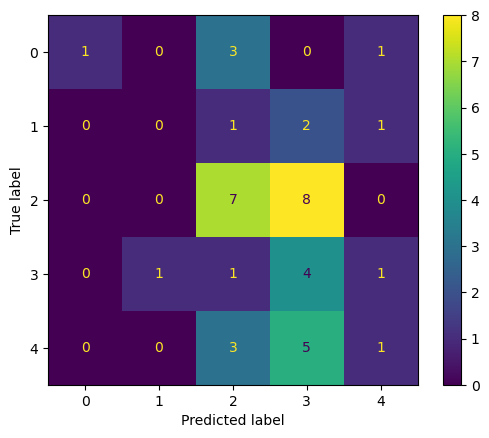

In [94]:
# Your code to display confusion matrix between predicted output and actual output

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()


### Earlier, we used rfb Kernel. Now, we will test other kernels too.

###  We will test on ['linear', 'poly', 'rbf', 'sigmoid' ] kernels.


In [96]:
# Create a list kernels with values ['linear', 'poly', 'rbf', 'sigmoid' ]

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Create an empty list accuracy

accuracy = []

In [97]:
for kernel in kernels:
    
    # Your code to compare the classifier for different Kernesls

    classifier = SVC(kernel = kernel)
    classifier.fit(X_train, y_train)
    
    test_pred = classifier.predict(X_test)
    
    test_score = accuracy_score(y_test, test_pred)
    
    accuracy.append(test_score)
    

In [98]:
accuracy

[0.35, 0.375, 0.325, 0.35]

In [62]:
# style to plot graphs

#plt.style.use('seaborn-darkgrid') 

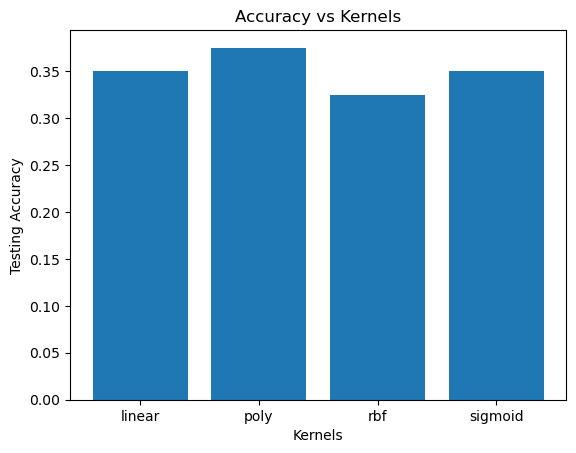

In [99]:
# Your code to plot accuracy vs kernels

plt.title('Accuracy vs Kernels')    

plt.bar(kernels, accuracy)

plt.xlabel('Kernels')
plt.ylabel('Testing Accuracy')

plt.show()



#### Which Kernel function is giving you best accuracy?

In [65]:
#I have the 'Poly'

In [100]:
# add accuracy value for SVM

test_scores_models.append(accuracy[1])
test_scores_models

[0.375, 0.375]

In [101]:
# add model to the list

models.append('SVM(Poly)')
models

['SVM(rbf)', 'SVM(Poly)']

# !! Next - Develop KNN and Losgistic regression classifiers for this dataset.


In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Develop KNN-based classifier. Use number of neigbours of your choice


knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

#### Evaluate KNN for accuracy, precision, recall, f-score, and classification report on test data.


In [103]:
# Your code to evaluate the classifer on test data
 
y_pred = knn.predict(X_test)

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' ))

print(classification_report(y_test, y_pred)) 

Accuracy test set:  0.325
Precision test set:  0.325
Recall test set:  0.325
F-score test set:  0.325
              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.17      0.25      0.20         4
           2       0.44      0.47      0.45        15
           3       0.15      0.29      0.20         7
           4       0.33      0.11      0.17         9

    accuracy                           0.33        40
   macro avg       0.42      0.30      0.32        40
weighted avg       0.41      0.33      0.33        40



In [104]:
# add accuracy value for k-NN

test_scores_models.append(accuracy_score(y_test, y_pred))
test_scores_models

[0.375, 0.375, 0.325]

In [109]:
# add model to the list

models.append('k-NN')
models

['SVM(rbf)', 'SVM(Poly)', 'k-NN']

#### Evaluate KNN for accuracy, precision, recall, f-score, and classification report on train data.


In [110]:
# Your code to evaluate the classifer on train data

train_data_predictions = knn.predict(X_train)

print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions))
print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' ))
print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' ))
print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' ))

print(classification_report(y_train, train_data_predictions))

Accuracy train set:  0.5014084507042254
Precision train set:  0.5014084507042254
Recall train set:  0.5014084507042254
F-score train set:  0.5014084507042254
              precision    recall  f1-score   support

           0       0.43      0.43      0.43        35
           1       0.49      0.38      0.43        58
           2       0.55      0.70      0.62       115
           3       0.51      0.47      0.49        96
           4       0.38      0.29      0.33        51

    accuracy                           0.50       355
   macro avg       0.47      0.46      0.46       355
weighted avg       0.49      0.50      0.49       355



#### Display confusion matric between predicted and actual values.


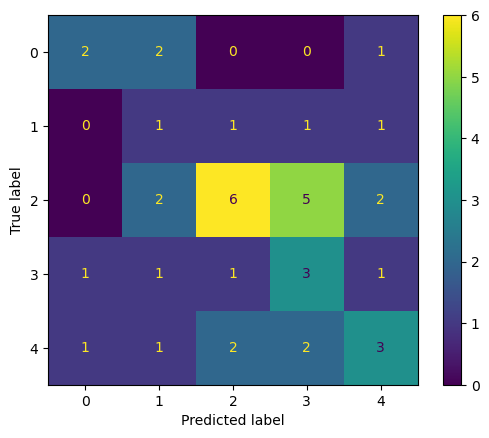

In [111]:
# Your code to display confusion matrix

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()

### Develop Logistic Regression-based classifier.

In [112]:
# Your code to develop logistic regression-based classifier

logisticRegression =  LogisticRegression(random_state = 0)
logisticRegression.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Evaluate Logistic Regression for accuracy, precision, recall, f-score, and classification report on test data.


In [113]:
# Your code to evaluate the logistic regression classifier on test data

# Your code to evaluate the classifer on test data
 
y_pred = logisticRegression.predict(X_test)

print("Accuracy test set: ", accuracy_score(y_test, y_pred))

print("Precision test set: ", precision_score(y_test, y_pred, average = 'micro' )) 
print("Recall test set: ", recall_score(y_test, y_pred, average = 'micro' ))
print("F-score test set: ", f1_score(y_test, y_pred, average = 'micro' ))

print(classification_report(y_test, y_pred)) 

Accuracy test set:  0.375
Precision test set:  0.375
Recall test set:  0.375
F-score test set:  0.375
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.14      0.25      0.18         4
           2       0.60      0.40      0.48        15
           3       0.27      0.43      0.33         7
           4       0.38      0.33      0.35         9

    accuracy                           0.38        40
   macro avg       0.38      0.36      0.36        40
weighted avg       0.43      0.38      0.39        40



In [114]:
# add accuracy value for logistic Regression

test_scores_models.append(accuracy_score(y_test, y_pred))
test_scores_models

[0.375, 0.375, 0.325, 0.375]

In [115]:
# add model to the list

models.append('logistic Regression')
models

['SVM(rbf)', 'SVM(Poly)', 'k-NN', 'logistic Regression']

#### Evaluate Logistic regression for accuracy, precision, recall, f-score, and classification report on train data.


In [116]:
# Your code to evaluate the logistic regression classifier on train data

train_data_predictions = logisticRegression.predict(X_train)

print("Accuracy train set: ", accuracy_score(y_train, train_data_predictions))
print("Precision train set: ", precision_score(y_train, train_data_predictions, average = 'micro' ))
print("Recall train set: ", recall_score(y_train, train_data_predictions, average = 'micro' ))
print("F-score train set: ", f1_score(y_train, train_data_predictions, average = 'micro' ))

print(classification_report(y_train, train_data_predictions))

Accuracy train set:  0.5070422535211268
Precision train set:  0.5070422535211268
Recall train set:  0.5070422535211268
F-score train set:  0.5070422535211268
              precision    recall  f1-score   support

           0       0.59      0.46      0.52        35
           1       0.50      0.28      0.36        58
           2       0.56      0.65      0.60       115
           3       0.47      0.51      0.49        96
           4       0.42      0.47      0.44        51

    accuracy                           0.51       355
   macro avg       0.51      0.47      0.48       355
weighted avg       0.51      0.51      0.50       355



#### Display confusion matrix between predicted and actual values for logistic regression.


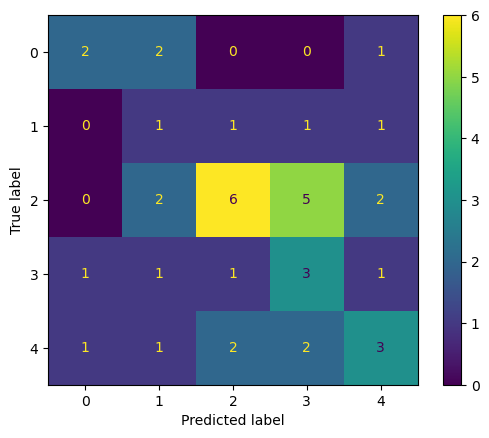

In [117]:
# Your code to display confusion matrix for logistic regression

cm = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = classifier.classes_)
disp.plot()
plt.show()

### Next, compare the accuracy, precision, recall, and F-score for all the classifiers using plots. You need to have only one plot rather than 4 different plots for 4 different meteruces.


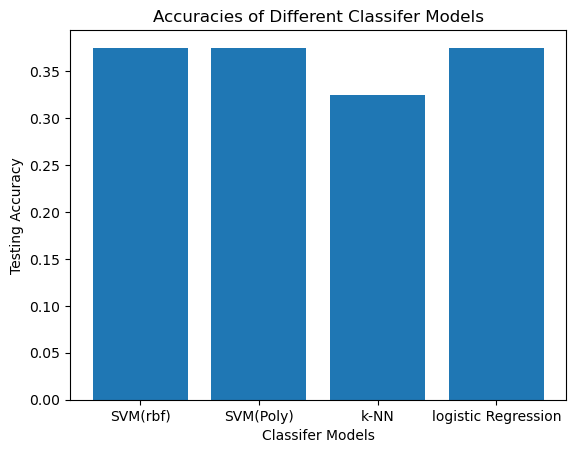

In [118]:
# Your code to plot and compare the performance of different algorithm

# Your code to plot accuracy vs kernels

plt.title('Accuracies of Different Сlassifer Models')    

plt.bar(models, test_scores_models)

plt.xlabel('Сlassifer Models')
plt.ylabel('Testing Accuracy')

plt.show()



In [119]:
test_scores_models

[0.375, 0.375, 0.325, 0.375]


### **Important - Document in your Lab Logbook**

# 1.   Include a plot comparing the performance of various algorithms.
# 2.    Specify the best-performing algorithm and indicate which category exhibits the best and least performance based on the confusion metrics.


In [121]:
models

['SVM(rbf)', 'SVM(Poly)', 'k-NN', 'logistic Regression']